# Data recording sheet







| Testing information | |
|---|---|
| Experiment | Rock vs No Rock |
| Description | Test effect of bicycle lean on maximal power output |
| Date | August 14, 2020 |
| Location | Locomotion Laboratory  |
| Subject | SD |
| Calibration factor | 278 |

---
## Protocol

- Charge Garmin, iPad, and IMUs
- Consent form
- Attach IMUs (frame=2050 , crank=2431)
- Set saddle height and handlebar position
- Sanitize bicycle
- Calibrate power meter
- Warm up
- Familiarization trials
- Pmax Test
- Begin experimental trials
  - Sync IMUs with Garmin at start and end of each trial 
- Gift card & signature

---
## Record

| Conditions ||
|---|---|
| 1 | Ad libitum |
| 2 | Self-restricted |
| 3 | Locked |

| Trial order ||
|---|---|
| Warm Up | 5 min at 100 W (3.5 lb) |
| Famil. | Standing and leaning (8.5 lb) |
| Pmax Test | 1, 1, 1 |
| Block 1 | 1, 2, 3 |
| Block 2 | 3, 1, 2 |
| Block 3 | 2, 3, 1 |

| Environmental conditions | |
|---|---|
| Temp. (C) | 21 |
| Humidity (%) | 48 |
| Pressure (mmHg) | 638 |
| Altitude (m) | 1641 |

| Subject characteristics ||
|---|---|
| Sex | M |
| Age (yrs) |  |
| Mass (lb/kg) |  /  |
| Height (ft/m) |  /  |

In [ ]:
# initialize packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# calculate hanging weights for Pmax test
mass = 160
listPerc = [0.06, 0.12, 0.18]
listRes = np.array(listPerc)*mass
listRes

---
## Pmax and Experimental Results
* Record directly to dataframe

In [ ]:
# create data table
df = pd.DataFrame(np.array([
                            [3, 0, 1, 12.5, 1025, 147], 
                            [3, 0, 2, 22.5, 1196, 115], 
                            [3, 0, 3, 32.5, 439, 31],
                            [3, 1, 1, 19.5, 1152, 116], 
                            [3, 2, 1, 19.5, 1073, 110], 
                            [3, 3, 1, 19.5, 1122, 119],
                            [3, 2, 2, 19.5, 1110, 111],
                            [3, 3, 2, 19.5, 1181, 121],
                            [3, 1, 2, 19.5, 1118, 118],
                            [3, 3, 3, 19.5, 1196, 122],
                            [3, 1, 3, 19.5, 1253, 124],
                            [3, 2, 3, 19.5, 1107, 122]
                            ]),
                    columns=['subject', 'condition', 'trial', 'hanging weight', 'power', 'cadence'])

---
##Data Analysis
* Fit curve to Pmax test results
* Calculate mean and SD power and cadence for experimental trials

Predicted maximal power output is 1242.139999999999
Predicted optimal hanging weight is 19.5


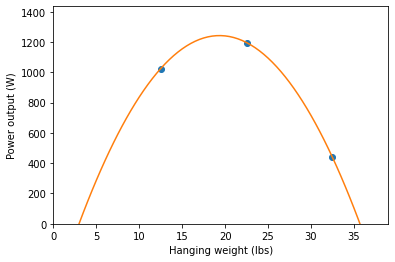

In [13]:
# fit curve to Pmax trials
# set data
x = df['hanging weight'][df['condition'] == 0]
y = df['power'][df['condition'] == 0]

# calculate polynomial 
c = np.polyfit(x,y,2)
poly = np.poly1d(c)

# calculate new x and y values
new_x = np.linspace(0, 50, 101)
new_y = poly(new_x)

# plot the polynomial
plt.plot(x, y, "o", new_x, new_y)
plt.xlim([0, max(x)*1.2])
plt.ylim([0, max(y)*1.2])
plt.xlabel('Hanging weight (lbs)')
plt.ylabel('Power output (W)')

ind = np.argmax(new_y)
xOpt = new_x[ind]
yOpt = max(new_y)

print("Predicted maximal power output is", yOpt)
print("Predicted optimal hanging weight is", xOpt)

In [ ]:
# calculate condition mean
df.groupby('condition')[['power','cadence']].mean()

In [ ]:
# calculate condition sd
df.groupby('condition')[['power','cadence']].std()